In [1]:
from psf_constants import FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX, \
                          FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX, \
                          FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH, \
                          FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH

from data_utils import load_numpy_data

from modeling_utils import create_fully_connected_architecture_for_amplitude_and_phase_reconstruction, \
                           compile_model, \
                           train_model, \
                           train_model_with_generator, \
                           store_model

from configurations import PSFSimpleFCModel as ModelConfig

from plot_utils import plot_amplitude_phase_fully_connected_prediction_from_electric_field, \
                       plot_model_history

2024-03-04 14:29:51.571037: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-03-04 14:29:51.619265: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-04 14:29:51.619296: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-04 14:29:51.620431: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-04 14:29:51.628331: I tensorflow/core/platform/cpu_feature_guar

In [2]:
tf = load_numpy_data(f"{FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX}00.npy")[:100]
tc = load_numpy_data(f"{FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX}00.npy")[:100]

validation_fluxes_array = load_numpy_data(FC_PROCESSED_VALIDATION_OUTPUT_FLUXES_FILE_PATH)
validation_complex_fields_array = load_numpy_data(FC_PROCESSED_VALIDATION_COMPLEX_FIELDS_FILE_PATH)

#validation_fluxes_array = load_numpy_data('a4.npy')
#validation_complex_fields_array = load_numpy_data('a3_processed.npy')

In [3]:
validation_fluxes_array.shape

(10000, 19)

In [4]:
validation_complex_fields_array.shape

(10000, 32768)

In [5]:
model_configuration = ModelConfig()
print(model_configuration.get_description())


	=== PSFReconstructor-100-64 ===
	*ARCHITECTURE HYPERPARAMETERS:
		-Fully Connected
		-Input shape: 19
		-Output shape: 32768
		-Hidden layers: [128, 128, 128, 128, 256, 256, 512, 2000, 4000]
		-Regularizer: None
		-Hidden Layers Activation: relu
		-Output Layer Activation: linear
		-Batch Normalization: False
		-Dropout: False, 0.2
	
	*COMPILATION HYPERPARAMETERS:
		-Optimizer: ADAM lr=0.001, beta_1=0.9, beta_2=0.999
		-Loss Function: MSE
		-Metric: MSE
	
	*TRAINING HYPERPARAMETERS:
		-Epochs: 10000
		-Batch size: 64
		-Callbacks: 
			-ReduceLROnPlateau: MSE 10 x0.1
			-Early Stop: MSE 25
	


2024-03-04 14:29:54.714940: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 14:29:54.855775: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-03-04 14:29:54.856370: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

In [6]:
model = create_fully_connected_architecture_for_amplitude_and_phase_reconstruction(
    *model_configuration.unpack_architecture_hyperparameters()
)


Model: "PSFReconstructor-100-64"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               2432      
                                                                 
 activation (Activation)     (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               16384     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16384     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 128)   

In [7]:
compile_model(
    model,
    *model_configuration.unpack_compilation_hyperparameters()
)

In [8]:
import numpy as np
history = train_model(
    model,
    tf,
    tc,
    tf,
    tc,
    *model_configuration.unpack_training_hyperparameters()
)

Epoch 1/10000


2024-03-04 14:29:57.430895: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-03-04 14:29:58.482067: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f0cb9a2fe50 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-03-04 14:29:58.482100: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 4070 Laptop GPU, Compute Capability 8.9
2024-03-04 14:29:58.488889: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2024-03-04 14:29:58.511351: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8904
I0000 00:00:1709522998.801141   59585 device_compiler.h:186] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


2/2 [==============================] - 6s 416ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - lr: 0.0010
Epoch 2/10000
2/2 [==============================] - 0s 216ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - lr: 0.0010
Epoch 3/10000
2/2 [==============================] - 0s 207ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - lr: 0.0010
Epoch 4/10000
2/2 [==============================] - 0s 191ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0370 - val_mean_squared_error: 0.0370 - lr: 0.0010
Epoch 5/10000
2/2 [==============================] - 0s 200ms/step - loss: 0.0370 - mean_squared_error: 0.0370 - val_loss: 0.0369 - val_mean_squared_error: 0.0369 - lr: 0.0010
Epoch 6/10000
2/2 [==============================] - 0s 203ms/step - loss: 0.0369 - mean_squared_error: 0.0369 - val_loss: 0.0369 - va

In [9]:
#history = train_model_with_generator(
#    model,
#    FC_PROCESSED_TRAIN_OUTPUT_FLUXES_PREFIX,
#    FC_PROCESSED_TRAIN_COMPLEX_FIELDS_PREFIX,
#    'a4.npy',
#    'a3_processed.npy',
#    validation_fluxes_array,
#    validation_complex_fields_array,
#    *model_configuration.unpack_training_hyperparameters(),
#    n_samples=70000
#)

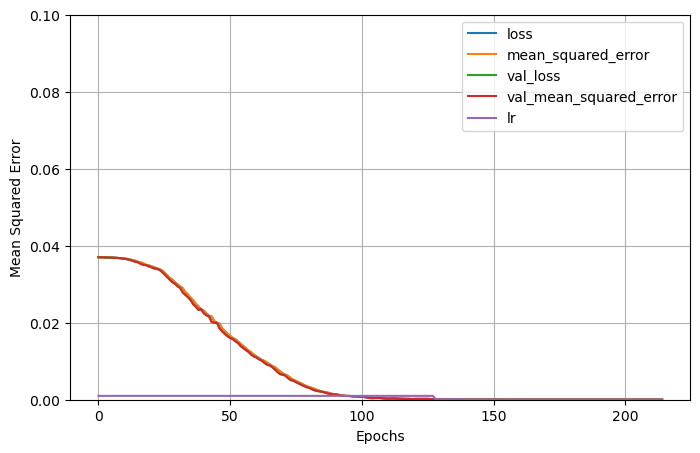

In [10]:
plot_model_history(history, top_y_lim=0.1)

In [12]:
store_model(model,
            model.name,
            model_configuration.get_description(),
            history.history['mean_squared_error'][-1],
            history.history['val_mean_squared_error'][-1],
            psf_model=True)

1/1 [==============================] - 0s 70ms/step


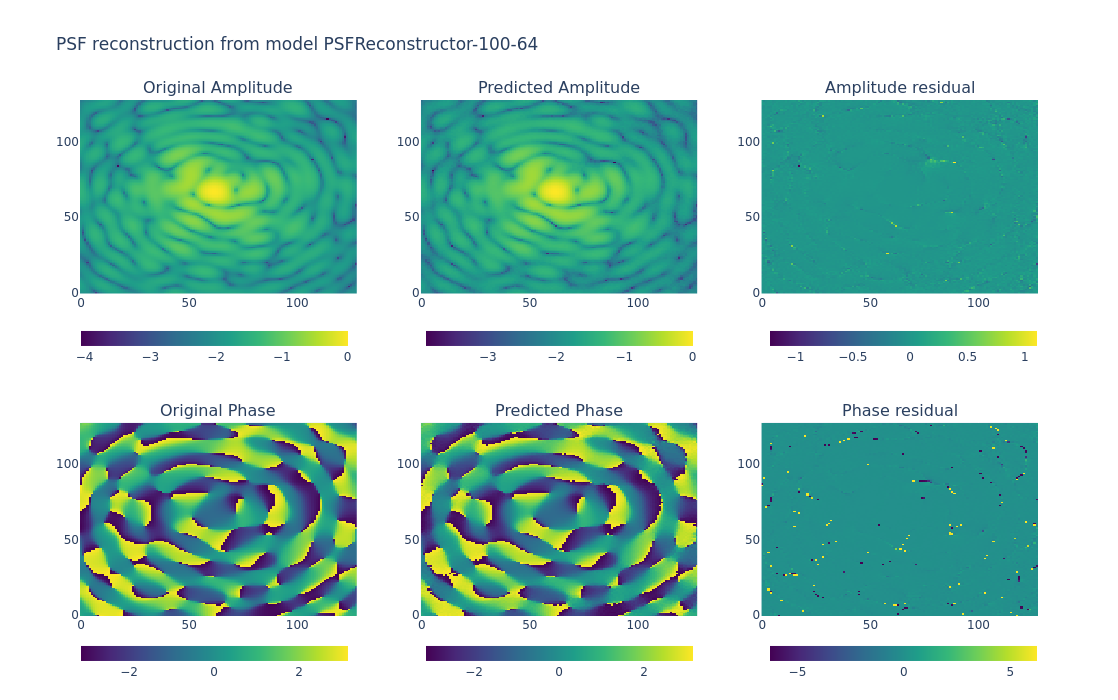

In [15]:
n = 106
plot_amplitude_phase_fully_connected_prediction_from_electric_field(model,
                                                                    tf[1],
                                                                    tc[1],
                                                                    log_scale=False)